In [16]:
%matplotlib inline

import ultralytics
ultralytics.checks()
from ultralytics import YOLO
model = YOLO("yolo11x.pt")

import torch
import torch.version
import torchvision
print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print(torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

from PIL import Image
import depth_pro

# Load model and preprocessing transform
depth_model, transform = depth_pro.create_model_and_transforms(device="cuda",precision=torch.float16)
depth_model.eval()

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

Ultralytics 8.3.85 🚀 Python-3.13.2 torch-2.6.0+cu126 CUDA:0 (NVIDIA RTX A2000 8GB Laptop GPU, 8192MiB)
Setup complete ✅ (24 CPUs, 15.5 GB RAM, 103.5/1006.9 GB disk)
Torch version: 2.6.0+cu126
Torchvision version: 0.21.0+cu126
12.6
CUDA available: True
CUDA version: 12.6


In [3]:
results = model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",stream=True,classes=[0])
for r in results:
    print(r.orig_shape)


video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 258.8ms
(720, 1280)
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 32.9ms
(720, 1280)
video 1/1 (frame 3/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 32.2ms
(720, 1280)
video 1/1 (frame 4/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 31.8ms
(720, 1280)
video 1/1 (frame 5/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 31.9ms
(720, 1280)
video 1/1 (frame 6/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 31.9ms
(720, 1280)
video 1/1 (frame 7/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 33.2ms
(720, 1280)
video 1/1 (frame 8/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 32.4ms
(720, 1280)
video 1/1 (frame 9/368) /root/SUSTGROUP/Homebr

In [2]:
results = model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",stream=True,classes=[0])
for r in results:
    #print(r.cuda())
    # Load and preprocess an image.
    #d_image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
    d_img = transform(r.orig_img).to("cuda")
    # Run inference.
    prediction = depth_model.infer(d_img)
    depth = prediction["depth"]  # Depth in [m].
    #focallength_px = prediction["focallength_px"]  # Focal length in pixels.

    print(depth.shape)


video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 88.4ms
torch.Size([720, 1280])
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 30.7ms
torch.Size([720, 1280])
video 1/1 (frame 3/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 38.5ms
torch.Size([720, 1280])
video 1/1 (frame 4/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 38.1ms
torch.Size([720, 1280])
video 1/1 (frame 5/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 40.1ms
torch.Size([720, 1280])
video 1/1 (frame 6/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 37.7ms
torch.Size([720, 1280])
video 1/1 (frame 7/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 384x640 4 persons, 38.0ms
torch.Size([720, 1280])
video 1/1 (frame 8/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 3

KeyboardInterrupt: 

In [7]:
# Load and preprocess an image.
image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
image = transform(image)

In [8]:
# Run inference.
prediction = depth_model.infer(image, f_px=f_px)
depth = prediction["depth"]  # Depth in [m].
focallength_px = prediction["focallength_px"]  # Focal length in pixels.

tensor([[2.1682, 2.4992, 2.6393,  ..., 2.5769, 2.5132, 2.4165],
        [2.6353, 2.6292, 2.6258,  ..., 2.5855, 2.5837, 2.6001],
        [2.6250, 2.6282, 2.6319,  ..., 2.5830, 2.5864, 2.5897],
        ...,
        [6.5091, 6.4676, 6.2196,  ..., 0.4581, 0.4580, 0.4570],
        [7.0227, 6.8405, 6.4666,  ..., 0.4589, 0.4592, 0.4594],
        [5.9889, 7.1293, 6.9391,  ..., 0.4613, 0.4669, 0.4776]], device='cuda:0')
tensor([[0.1443, 0.1720, 0.1837,  ..., 0.1785, 0.1732, 0.1651],
        [0.1834, 0.1829, 0.1826,  ..., 0.1792, 0.1791, 0.1805],
        [0.1825, 0.1828, 0.1831,  ..., 0.1790, 0.1793, 0.1796],
        ...,
        [0.5075, 0.5040, 0.4832,  ..., 0.0013, 0.0013, 0.0012],
        [0.5504, 0.5352, 0.5039,  ..., 0.0013, 0.0014, 0.0014],
        [0.4639, 0.5593, 0.5434,  ..., 0.0015, 0.0020, 0.0029]], device='cuda:0')


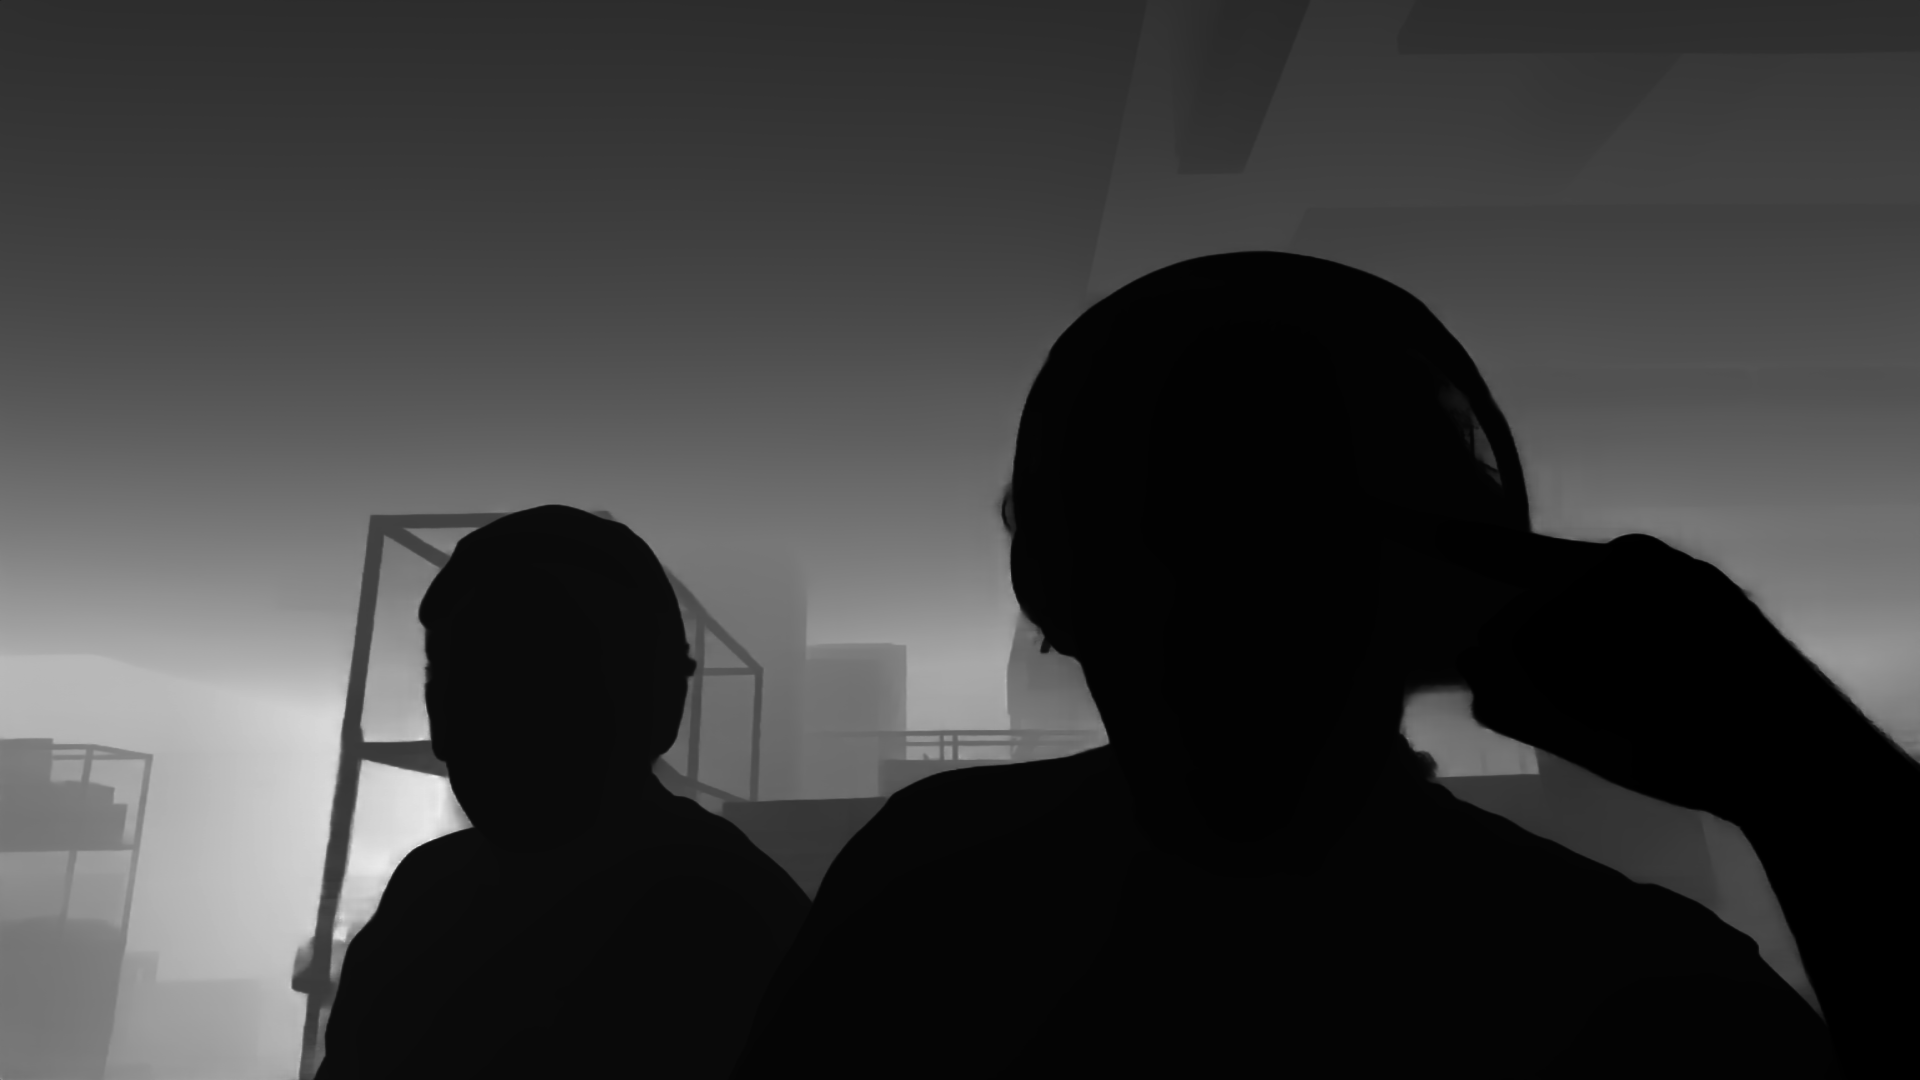

In [9]:
import numpy as np

print(depth)
depth = (depth - depth.min()) / depth.max()
print(depth)
# Remove the extra channel dimension if present.
img_array = depth.cpu().numpy()

# Convert the image from [0, 1] to [0, 255] and cast to uint8.
img_array = (img_array*255).astype(np.uint8)

# Create a PIL image in grayscale mode ('L').
pil_img = Image.fromarray(img_array, mode='L')

# Display the image using PIL's built-in viewer.
pil_img.show()

In [4]:
def calculate_l2_norms(centroids, threshold=100.0, device='cuda'):
    """
    Vectorized function to calculate pairwise L2 norms between centroids (3D) on GPU
    and return group memberships based on a distance threshold.

    Parameters:
    centroids (torch.Tensor): A tensor of shape (N, 3) representing object centroids (x, y, z) for the current frame.
    threshold (float): The distance threshold to consider objects in the same group.
    device (str): Device where the tensors are stored ('cpu' or 'cuda').

    Returns:
    group_memberships (list of sets): List of sets, each set contains indices of objects that are in the same group.
    """
    centroids = centroids.to(device)  # Move centroids tensor to the appropriate device

    # Compute pairwise L2 distances using broadcasting in PyTorch
    diff = centroids[:, None, :] - centroids[None, :, :]  # Shape (N, N, 3)
    dist_matrix = torch.norm(diff, dim=2)  # Shape (N, N), compute the L2 norm along axis 2

    # Create a list of groups based on the distance threshold
    num_objects = centroids.shape[0]
    group_memberships = []

    for i in range(num_objects):
        group = set([i])  # Start with the current object in its own group
        for j in range(num_objects):
            if i != j and dist_matrix[i, j] < threshold:
                group.add(j)
        group_memberships.append(group)

    return group_memberships

def track_groups(previous_groups, current_groups):
    """
    Function to track if objects have joined or left groups between frames.

    Parameters:
    previous_groups (list of sets): List of sets from the previous frame's group memberships.
    current_groups (list of sets): List of sets from the current frame's group memberships.

    Returns:
    joined (list): List of object indices that joined a new group.
    left (list): List of object indices that left a group.
    """
    joined = []
    left = []

    # Create sets to track which objects have changed groups
    prev_indices = {frozenset(group) for group in previous_groups}
    curr_indices = {frozenset(group) for group in current_groups}

    # Detect objects joining new groups
    for i, current_group in enumerate(current_groups):
        if frozenset(current_group) not in prev_indices:
            joined.append(i)

    # Detect objects leaving groups
    for i, prev_group in enumerate(previous_groups):
        if frozenset(prev_group) not in curr_indices:
            left.append(i)

    return joined, left


In [ ]:
results = model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",stream=True,imgsz=1280,classes=[0],vid_stride=10)
for r in results:
    #print(r.cuda())
    # Load and preprocess an image.
    #d_image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
    d_img = transform(r.orig_img).to("cuda")
    # Run inference.
    prediction = depth_model.infer(d_img)
    depth = prediction["depth"]  # Depth in [m].
    #focallength_px = prediction["focallength_px"]  # Focal length in pixels.

    print(depth.shape)

    richard = torch.empty(0,3).to("cuda")
    for i in r.boxes:
        xy = i.xyxy[0]#; print(xy); print(xy[:2],xy[2:])
        c = torch.tensor([ (xy[:2][0]+xy[2:][0])/2, (xy[2:][-1]+xy[:2][-1])/2 ], device="cuda"); print("centroids",c)
        wh = i.xywh[0]# ;print(wh)
        d = depth[int(c[1].item())][int(c[0].item())]; print("depth value at centroid (m)",d)
        #d = ((2*torch.pi*180)/(wh[2]+wh[3]*360)*1000+3); print(d)
        #id = i.id; print(i.id)
        
        blobs = torch.hstack((c,d)); print(blobs)
        richard = torch.vstack((richard,blobs))#; print("this is richard say hello:", richard)
    #dist = calculate_l2_norms(richard); print("these are the groups:", dist)

    clustering = DBSCAN(eps=100, min_samples=2).fit(richard.cpu().numpy())
    print(clustering.labels_)

    plt.scatter(richard.cpu().numpy()[:,0],richard.cpu().numpy()[:,1],c=clustering.labels_)
    plt.xlim(0,1280)
    plt.ylim(0,720)
plt.show()

In [27]:
results = model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",stream=True,classes=[0],half=False,imgsz=1280,vid_stride=1)
frame=1
for r in results:
    #print(r.cuda())
    # Load and preprocess an image.
    #d_image, _, f_px = depth_pro.load_rgb("Homebrew-image/WIN_20250308_20_09_29_Pro.jpg")
    d_img = transform(r.orig_img).to("cuda")
    # Run inference.
    prediction = depth_model.infer(d_img)
    depth = prediction["depth"]  # Depth in [m].
    #focallength_px = prediction["focallength_px"]  # Focal length in pixels.

    print(depth.shape)

    richard = torch.empty(0,3).to("cuda")
    for i in r.boxes:
        xy = i.xyxy[0]#; print(xy); print(xy[:2],xy[2:])
        c = torch.tensor([ (xy[:2][0]+xy[2:][0])/2, (xy[2:][-1]+xy[:2][-1])/2 ], device="cuda"); print("centroids",c)
        wh = i.xywh[0]# ;print(wh)
        d = depth[int(c[1].item())][int(c[0].item())]; print("depth value at centroid (m)",d)
        #d = ((2*torch.pi*180)/(wh[2]+wh[3]*360)*1000+3); print(d)
        #id = i.id; print(i.id)
        
        blobs = torch.hstack((c,d)); print(blobs)
        richard = torch.vstack((richard,blobs))#; print("this is richard say hello:", richard)
    #dist = calculate_l2_norms(richard); print("these are the groups:", dist)

    clustering = DBSCAN(eps=100, min_samples=2).fit(richard.cpu().numpy())
    labs = clustering.labels_
    print(labs)

    
    plt.imshow(r.orig_img)
    scatter = plt.scatter(richard.cpu().numpy()[:,0],richard.cpu().numpy()[:,1],c=labs,label=labs)
    plt.legend(*scatter.legend_elements(),
               title="Classes")
    #plt.xlim(0,1280)
    #plt.ylim(0,720)
    plt.tight_layout
    plt.savefig(f"runs/dots/frame_{frame}",dpi=200)
    frame += 1
    plt.clf()


video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 252.5ms
torch.Size([720, 1280])
centroids tensor([995.5000, 483.7500], device='cuda:0')
depth value at centroid (m) tensor(9.7689, device='cuda:0')
tensor([995.5000, 483.7500,   9.7689], device='cuda:0')
centroids tensor([935.0000, 475.5000], device='cuda:0')
depth value at centroid (m) tensor(10.3083, device='cuda:0')
tensor([935.0000, 475.5000,  10.3083], device='cuda:0')
centroids tensor([1034.0000,  470.5000], device='cuda:0')
depth value at centroid (m) tensor(9.8839, device='cuda:0')
tensor([1034.0000,  470.5000,    9.8839], device='cuda:0')
centroids tensor([910., 466.], device='cuda:0')
depth value at centroid (m) tensor(10.9370, device='cuda:0')
tensor([910.0000, 466.0000,  10.9370], device='cuda:0')
[0 0 0 0]
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 49.5ms
torch.Size([720, 1280])
centroids tensor([995.0741, 482.9976]

<Figure size 640x480 with 0 Axes>

In [28]:
model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",save=True,classes=[0],half=False,imgsz=1280,vid_stride=1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 382.2ms
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 51.2ms
video 1/1 (frame 3/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 50.8ms
video 1/1 (frame 4/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 49.9ms
video 1/1 (frame 5/368)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [30]:
model.track(source="Homebrew-video/Low-quality/IMG_5347.MP4",save=True,classes=[0],half=False,imgsz=1280,vid_stride=1,iou=0.9,conf=0.5)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 334.9ms
video 1/1 (frame 2/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 51.8ms
video 1/1 (frame 3/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 50.8ms
video 1/1 (frame 4/368) /root/SUSTGROUP/Homebrew-video/Low-quality/IMG_5347.MP4: 736x1280 4 persons, 48.1ms
video 1/1 (frame 5/368)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p